# Oxygen and Spin-Lattice Relaxation Rate in Water, Blood and in Tissues

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# Import seaborn
import seaborn as sns
# Apply the default theme
plt.style.use('ggplot')
import scipy
import math

# 1. Oxygen and Relaxation Rate in a Solution
There is a linear relationship between $R1$ (or $1/T1$) and concentration of oxygen in water. 

$R1=R1_0 + r_1*C$

$\frac{T1_0-T1}{T1*T1_0} = r_1 * C $

The relationship between $C$ is the amount of oxygen added, $r_1$ is the relaxivity of oxygen in water.

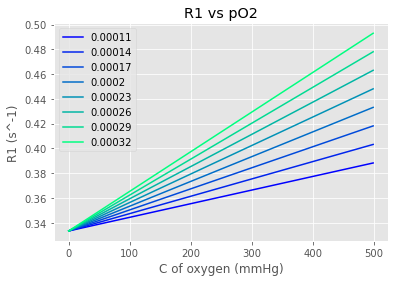

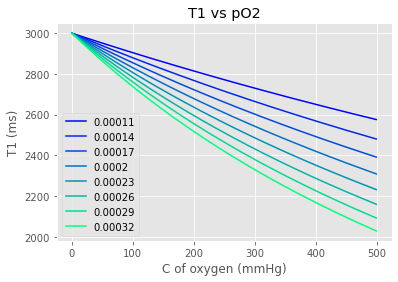

In [3]:
T1_0=3000 # T1 in ms
R1_0=(1/T1_0)*1000 # R1 in s^-1
C=np.arange(0,500) # mmHg



fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
    
for x in range(11,35,3):
    r1=x/100000 #s-1/mmHg - from 2016 Muir Table 1 - water 1.5T Zaharchuk 2006
    R1_after=R1_0+(r1*C)
    T1_after=(1/R1_after)*1000
    
    plt.plot(C,R1_after,label=str(r1))
    plt.title('R1 vs pO2')
    plt.xlabel('C of oxygen (mmHg)')
    plt.ylabel('R1 (s^-1)')
colormap = plt.cm.winter #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
for x in range(11,35,3):
    r1=x/100000 #s-1/mmHg - from 2016 Muir Table 1 - water 1.5T Zaharchuk 2006
    R1_after=R1_0+(r1*C)
    T1_after=(1/R1_after)*1000
    
    plt.plot(C,T1_after,label=str(r1))
    plt.title('T1 vs pO2')
    plt.xlabel('C of oxygen (mmHg)')
    plt.ylabel('T1 (ms)')

    colormap = plt.cm.winter #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(ax2.lines))]
for i,j in enumerate(ax2.lines):
    j.set_color(colors[i])
plt.legend()




# 2. Delta T1 and Delta R1
The relationship between T1 vs delta T1, and R1 vs delta R1, after adding a source of additional relaxivity (ie 200 mmHg oxygen). Although looking at changes in T1 feels more intuitive (and has more intuitive units such as $ms$, rather than R1 $s^{-1}$, the change in T1 induced by oxygen depends on the original T1, and looking at changes in R1 instead removes this dependency. This can be seen clearly in the following plots:

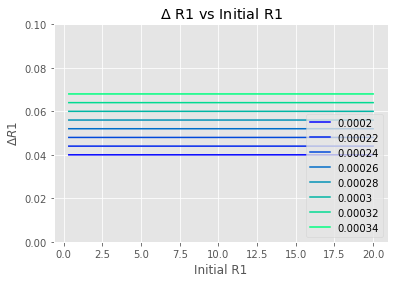

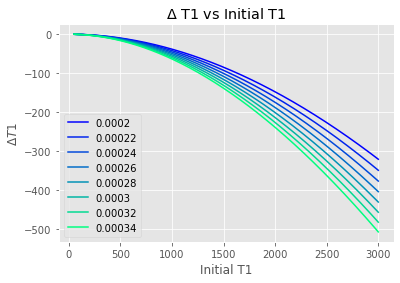

In [4]:
T1_0=np.arange(50,3000) # T1 in ms
R1_0=(1/T1_0)*1000 # R1 in s^-1
r1_water=0.00025 #s-1/mmHg - from 2016 Muir Table 1 - water 1.5T Zaharchuk 2006
C=200 # mmHg
R1_after=R1_0+(r1_water*C)
T1_after=(1/R1_after)*1000

delta_R1_example=R1_after-R1_0
delta_T1_example=T1_after-T1_0


fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
    
for x in range(20,35,2):
    r1=x/100000 #s-1/mmHg - from 2016 Muir Table 1 - water 1.5T Zaharchuk 2006
    R1_after=R1_0+(r1*C)
    delta_R1_example=R1_after-R1_0
    
    plt.plot(R1_0,delta_R1_example,label=str(r1))
    plt.ylim(0,0.1)
    plt.title('$\Delta$ R1 vs Initial R1')
    plt.xlabel('Initial R1')
    plt.ylabel('$\Delta R1$')
    
colormap = plt.cm.winter #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
for x in range(20,35,2):
    r1=x/100000 #s-1/mmHg - from 2016 Muir Table 1 - water 1.5T Zaharchuk 2006
    R1_after=R1_0+(r1*C)
    delta_R1_example=R1_after-R1_0
    T1_after=(1/R1_after)*1000
    delta_T1_example=T1_after-T1_0
    
    plt.plot(T1_0,delta_T1_example,label=str(r1))
    plt.title('$\Delta$ T1 vs Initial T1')
    plt.xlabel('Initial T1')
    plt.ylabel('$\Delta T1$')

colormap = plt.cm.winter #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(ax2.lines))]
for i,j in enumerate(ax2.lines):
    j.set_color(colors[i])
plt.legend()


# 3. R1 and T1 of Blood, depending on SO2 levels
The following 3 equations are from Hales 2015 *(A general model to calculate the spin-lattice (T1) relaxation time of blood, accounting for haematocrit, oxygen saturation and magnetic field strength).* In these demos, for now we will not account for changes in magnetic field strength, and instead all values will be correct for 1.5T.

$R1_{blood}(Hct,SO2)=f_{watere}*R1_e(SO2) + (1-f_{watere})R1_p$

Where:
- R1blood = the relaxation rate of whole blood
- Hct is the hematocrit (0-1)
- SO2 is the oxygen saturation fraction (0-1)
- R1p is the longitudinal relaxation rate of plasma (s-1).


$f_{watere}$ is the fraction of water in whole blood that resides in erythrocytes(0-1), which is described by:

$f_{watere} = \frac{0.70*Hct}{0.70*Hct+0.95*(1-Hct)}$

$R1_e$ is the longitudinal relaxation rate of erythrocytes ($s^{-1}$) which can be calculated by:


$R1_e(SO2) = R1_{eox} + r1_{deoxyHb}[Hb]*(1-SO2)$


- R1eox is the relaxation rate of erythrocytes when SO2=100%
- [Hb] is the mean corpuscular haemoglobin concentration (5.15mmol Hb tetramer/L plasma)
- rdeoxyHb is the molar relaxivity of deoxyhaemoglobin (s-1 L plasma in erythrocyte/mmol Hb tetramer).


### Changing Oxygen Saturation (SO2), Varied Hematocrit, Constant Field Strength


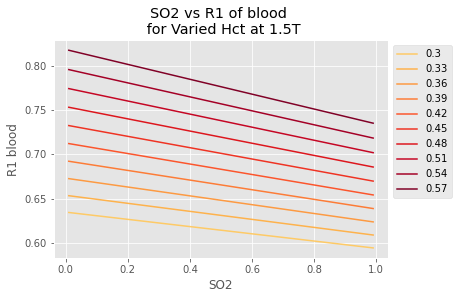

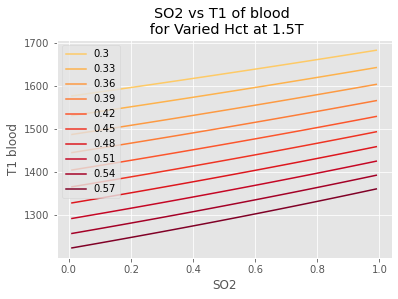

In [5]:
B0=1.5 # Tesla
 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma
#print(fwatere)
r1deoxyHb=0.033 #s-1 L plasma in erythrocyte / mmol Hb tetramer
r1=0.00025 #s-1/mmHg
bR1eox=1.099 #s-1
mR1eox=-0.057 #s-1 T-1
bR1p=0.496 #s-1
mR1p=-0.023 #s-1 T-1


fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in range(30,60,3):
    Hct=x/100
    fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    so2=(np.arange(1,100))/100
    R1_blood=fwatere*(bR1eox+(mR1eox*B0)+((r1deoxyHb*Hb)*(1-so2)))+((1-fwatere)*(bR1p+(mR1p*B0)))
    plt.plot(so2,R1_blood,label=str(Hct))
    plt.title('SO2 vs R1 of blood \n for Varied Hct at 1.5T')
    plt.xlabel('SO2')
    plt.ylabel('R1 blood')
colormap = plt.cm.YlOrRd #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.3, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))
    

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in range(30,60,3):
    Hct=x/100
    fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    so2=(np.arange(1,100))/100
    R1_blood=fwatere*(bR1eox+(mR1eox*B0)+((r1deoxyHb*Hb)*(1-so2)))+((1-fwatere)*(bR1p+(mR1p*B0)))
    T1_blood=(1/R1_blood)*1000
    plt.plot(so2,T1_blood,label=str(Hct))
    plt.title('SO2 vs T1 of blood \n for Varied Hct at 1.5T')
    plt.xlabel('SO2')
    plt.ylabel('T1 blood')
colormap = plt.cm.YlOrRd #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.3, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend()

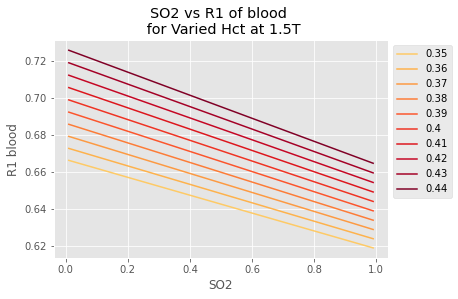

In [6]:
B0=1.5 # Tesla
 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma
#print(fwatere)
r1deoxyHb=0.033 #s-1 L plasma in erythrocyte / mmol Hb tetramer
r1=0.00025 #s-1/mmHg
bR1eox=1.099 #s-1
mR1eox=-0.057 #s-1 T-1
bR1p=0.496 #s-1
mR1p=-0.023 #s-1 T-1


fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in range(35,45,1):
    Hct=x/100
    fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    so2=(np.arange(1,100))/100
    R1_blood=fwatere*(bR1eox+(mR1eox*B0)+((r1deoxyHb*Hb)*(1-so2)))+((1-fwatere)*(bR1p+(mR1p*B0)))
    plt.plot(so2,R1_blood,label=str(Hct))
    plt.title('SO2 vs R1 of blood \n for Varied Hct at 1.5T')
    plt.xlabel('SO2')
    plt.ylabel('R1 blood')
colormap = plt.cm.YlOrRd #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.3, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))
    

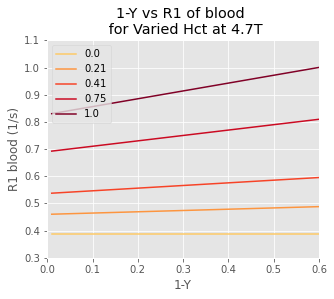

In [63]:
B0=4.7 # Tesla
 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma
#print(fwatere)
r1deoxyHb=0.056 #s-1 L plasma in erythrocyte / mmol Hb tetramer
r1=0.00025 #s-1/mmHg
bR1eox=1.10 #s-1 1.10
mR1eox=-0.058 #s-1 T-1 -0.058
bR1p=0.496 #s-1
mR1p=-0.023 #s-1 T-1



fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in (0,21,41,75,100):
    Hct=x/100
    fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    so2=(np.arange(1,100))/100
    x_axis=(1-so2)
    R1_blood=fwatere*(bR1eox+(mR1eox*B0)+((r1deoxyHb*Hb)*(1-so2)))+((1-fwatere)*(bR1p+(mR1p*B0)))
    plt.plot(x_axis,R1_blood,label=str(Hct))
    plt.title('1-Y vs R1 of blood \n for Varied Hct at 4.7T')
    plt.xlabel('1-Y')
    plt.ylim(0.3,1.1)
    plt.xlim(0,0.6)
    plt.ylabel('R1 blood (1/s)')
colormap = plt.cm.YlOrRd #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.3, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend()
plt.gca().set_aspect(0.60)


In [46]:
bR1eox+(mR1eox*B0)

0.8311

Previous data has recorded this in terms of deoxygenation (1-Y), with Y being SO2, so for convenience of comparison, let's also plot it as 1-Y to compare with this data from ["Effects of hematocrit and oxygen saturation level on blood spin-lattice relaxation" by Silvennoinen et al.](https://pubmed.ncbi.nlm.nih.gov/12594761/). Note that this experiment was performed at 4.7T.

<img src="hematocrit_data.png" width="400"  style="float:left" />


### Changing Oxygen Saturation (SO2), Constant Hematocrit, Changing Field Strength

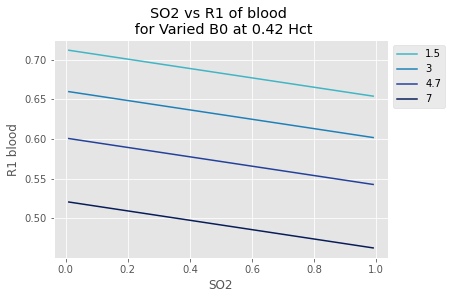

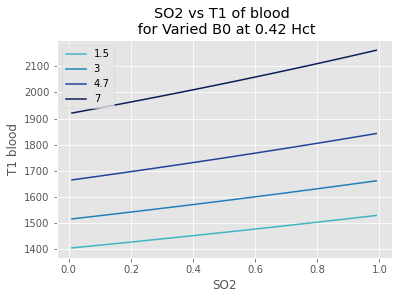

In [8]:

Hb=5.15 # mmol Hb tetramer/L plasma
#print(fwatere)
r1deoxyHb=0.033 #s-1 L plasma in erythrocyte / mmol Hb tetramer
r1=0.00025 #s-1/mmHg
bR1eox=1.099 #s-1
mR1eox=-0.057 #s-1 T-1
bR1p=0.496 #s-1
mR1p=-0.023 #s-1 T-1
Hct=0.42


fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in [1.5,3,4.7,7]:
    B0=x
    fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    so2=(np.arange(1,100))/100
    R1_blood=fwatere*(bR1eox+(mR1eox*B0)+((r1deoxyHb*Hb)*(1-so2)))+((1-fwatere)*(bR1p+(mR1p*B0)))
    plt.plot(so2,R1_blood,label=str(B0))
    plt.title('SO2 vs R1 of blood \n for Varied B0 at 0.42 Hct')
    plt.xlabel('SO2')
    plt.ylabel('R1 blood')
colormap = plt.cm.YlGnBu #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.5,1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))
    

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in [1.5,3,4.7,7]:
    B0=x
    fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    so2=(np.arange(1,100))/100
    R1_blood=fwatere*(bR1eox+(mR1eox*B0)+((r1deoxyHb*Hb)*(1-so2)))+((1-fwatere)*(bR1p+(mR1p*B0)))
    T1_blood=(1/R1_blood)*1000
    plt.plot(so2,T1_blood,label=str(B0))
    plt.title('SO2 vs T1 of blood \n for Varied B0 at 0.42 Hct')
    plt.xlabel('SO2')
    plt.ylabel('T1 blood')
colormap = plt.cm.YlGnBu #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.5,1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend()

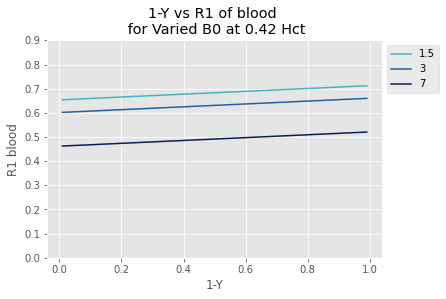

In [9]:
Hb=5.15 # mmol Hb tetramer/L plasma
#print(fwatere)
r1deoxyHb=0.033 #s-1 L plasma in erythrocyte / mmol Hb tetramer
r1=0.00025 #s-1/mmHg
bR1eox=1.099 #s-1
mR1eox=-0.057 #s-1 T-1
bR1p=0.496 #s-1
mR1p=-0.023 #s-1 T-1 # from Hales paper
Hct=0.42 # blockley used range of 0.42-0.47 for that plot down below

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in [1.5,3,7]:
    B0=x
    fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    so2=(np.arange(1,100))/100
    x_axis=(1-so2)
    R1_blood=fwatere*(bR1eox+(mR1eox*B0)+((r1deoxyHb*Hb)*(1-so2)))+((1-fwatere)*(bR1p+(mR1p*B0)))
    plt.plot(x_axis,R1_blood,label=str(B0))
    plt.title('1-Y vs R1 of blood \n for Varied B0 at 0.42 Hct')
    plt.xlabel('1-Y')
    plt.ylim(0,0.9)
    plt.ylabel('R1 blood')
colormap = plt.cm.YlGnBu #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.5,1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))


Previous data has recorded this in terms of deoxygenation (1-Y), 
with Y being SO2, so for convenience of comparison, let's also plot it as 1-Y to compare with this data from
["Field strength dependence of R1 and R2* relaxivities of human whole blood to prohance, vasovist, and deoxyhemoglobin".](https://onlinelibrary.wiley.com/doi/full/10.1002/mrm.21792). 

<img src="blockley_b0_so2.png" width="700"  style="float:left" />

### Hct vs R1: Range of SO2, Constant Field Strength

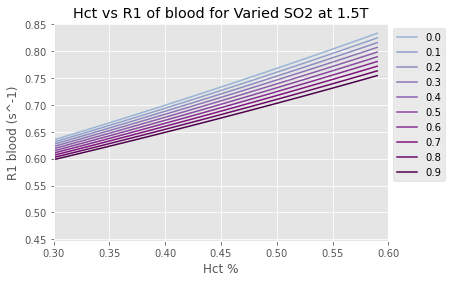

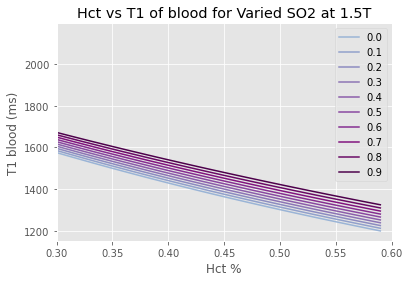

In [10]:
Hb=5.15 # mmol Hb tetramer/L plasma
#print(fwatere)
r1deoxyHb=0.033 #s-1 L plasma in erythrocyte / mmol Hb tetramer
r1=0.00025 #s-1/mmHg
bR1eox=1.099 #s-1
mR1eox=-0.057 #s-1 T-1
bR1p=0.496 #s-1
mR1p=-0.023 #s-1 T-1 # from Hales paper
B0=1.5

Hct=(np.arange(1,60))/100
fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for i in range(0,100,10):
    so2=i/100
    R1_blood=fwatere*(bR1eox+(mR1eox*B0)+((r1deoxyHb*Hb)*(1-so2)))+((1-fwatere)*(bR1p+(mR1p*B0)))
    plt.plot(Hct,R1_blood,label=str(so2))
    colormap = plt.cm.BuPu #nipy_spectral, Set1,Paired   
    colors = [colormap(i) for i in np.linspace(0.4, 1,len(ax1.lines))]
    for i,j in enumerate(ax1.lines):
        j.set_color(colors[i])
    plt.title('Hct vs R1 of blood for Varied SO2 at 1.5T')
    plt.xlabel('Hct %')
    plt.ylabel('R1 blood (s^-1)')
    plt.xlim(0.3,0.6)
    plt.legend(bbox_to_anchor=(1, 1))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
for i in range(0,100,10):
    so2=i/100
    R1_blood=fwatere*(bR1eox+(mR1eox*B0)+((r1deoxyHb*Hb)*(1-so2)))+((1-fwatere)*(bR1p+(mR1p*B0)))
    T1_blood=(1/R1_blood)*1000
    plt.plot(Hct,T1_blood,label=str(so2))
    colormap = plt.cm.BuPu #nipy_spectral, Set1,Paired   
    colors = [colormap(i) for i in np.linspace(0.4, 1,len(ax2.lines))]
    for i,j in enumerate(ax2.lines):
        j.set_color(colors[i])
    plt.title('Hct vs T1 of blood for Varied SO2 at 1.5T')
    plt.xlabel('Hct %')
    plt.ylabel('T1 blood (ms)')
    plt.xlim(0.3,0.6)
    plt.legend(bbox_to_anchor=(1, 1))


### Hct vs R1: Range of SO2, Varied Field Strength

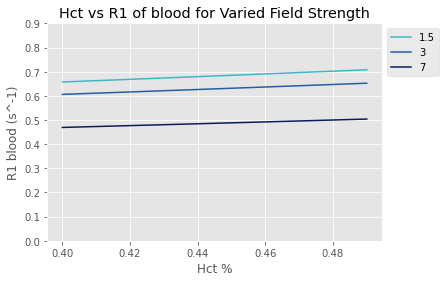

In [11]:
## R1 and T1 of Blood, depending on SO2 levels
Hb=5.15 # mmol Hb tetramer/L plasma
#print(fwatere)
r1deoxyHb=0.033 #s-1 L plasma in erythrocyte / mmol Hb tetramer
r1=0.00025 #s-1/mmHg
bR1eox=1.099 #s-1
mR1eox=-0.057 #s-1 T-1
bR1p=0.496 #s-1
mR1p=-0.023 #s-1 T-1 # from Hales paper

Hct=(np.arange(40,50))/100
fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for i in (1.5,3,7):
    so2=0.75
    B0=i
    R1_blood=fwatere*(bR1eox+(mR1eox*B0)+((r1deoxyHb*Hb)*(1-so2)))+((1-fwatere)*(bR1p+(mR1p*B0)))
    plt.plot(Hct,R1_blood,label=str(B0))
    colormap = plt.cm.YlGnBu #nipy_spectral, Set1,Paired   
    colors = [colormap(i) for i in np.linspace(0.5,1,len(ax1.lines))]
    for i,j in enumerate(ax1.lines):
        j.set_color(colors[i])
    plt.title('Hct vs R1 of blood for Varied Field Strength')
    plt.xlabel('Hct %')
    plt.ylabel('R1 blood (s^-1)')
    plt.ylim(0,0.9)
    plt.legend(bbox_to_anchor=(1, 1))

Blockley et al have measured R1 vs Hct for varying field strengths, here is the plot: (from 
["Field strength dependence of R1 and R2* relaxivities of human whole blood to prohance, vasovist, and deoxyhemoglobin"](https://onlinelibrary.wiley.com/doi/full/10.1002/mrm.21792). )

<img src="blockley_hct.png" width="400"  style="float:left" />

## ------------------------------------------
## Up to this point, the estimated R1 values from the model matches literature values for blood R1 at varying field strengths, oxygen saturation levels, and hematocrit levels. The model is currently unchanged from the Hales 2016 model.  From here on are my own changes, so I'll have to validate these as well.
## ------------------------------------------

# 4. Including the Oxygen Dissociation Curve
The [oxygen–hemoglobin dissociation curve](https://en.wikipedia.org/wiki/Oxygen%E2%80%93hemoglobin_dissociation_curve), or oxygen dissociation curve (ODC), relates oxygen saturation (SO2) and partial pressure of oxygen in the blood (PO2), and is determined by what is called "hemoglobin affinity for oxygen"; that is, how readily hemoglobin acquires and releases oxygen molecules into the fluid that surrounds it.

To relate the oxygen tesnion in the blood to the SO2, we can use the following equation from Severinghaus' ['Simple, accurate equations for human blood O2 dissociation computations'](http://www.nickalls.org/dick/papers/anes/JWSrevised2007.pdf):

$S=((23400*((pO2^3)+150*pO2)^{-1}+1)^{-1})$

(0.0, 100.0)

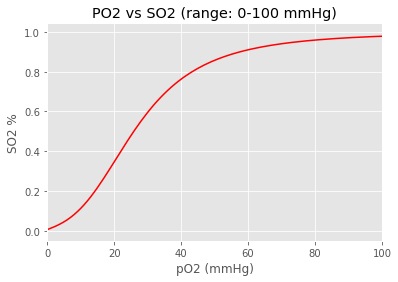

In [12]:
po2_list=np.arange(0,150)
so2_list=np.zeros(150)
for i in range(1,150):
    po2=i
    S=((23400*(((po2**3)+150*po2)**(-1))+1)**(-1))
    #print(S*100)
    so2_list[i-1]=S
fig=plt.figure(1)
plt.plot(po2_list,so2_list, 'r-')
plt.title('PO2 vs SO2 (range: 0-100 mmHg)')
plt.xlabel('pO2 (mmHg)')
plt.ylabel('SO2 %')
plt.xlim(0,100)


We can compare this plot with other examples of the dissociation curve:

<img src="Hb-O2-dissociation-curve.jpg" width="400"  style="float:left" />

Alternatively, we can use the invertible form of the equation:


(0.0, 100.0)

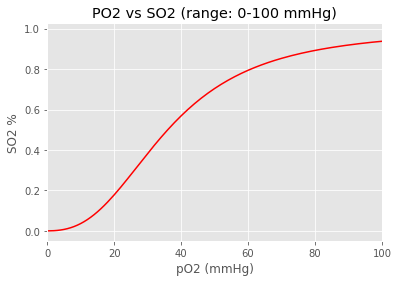

In [66]:
P50=37
n=2.7
po2_list=np.arange(0,150)
so2_list=np.zeros(150)
for i in range(1,150):
    po2=i
    S=(po2**n)/((po2**n)+(P50**n))
    #print(S*100)
    so2_list[i-1]=S
fig=plt.figure(1)
plt.plot(po2_list,so2_list, 'r-')
plt.title('PO2 vs SO2 (range: 0-100 mmHg)')
plt.xlabel('pO2 (mmHg)')
plt.ylabel('SO2 %')
plt.xlim(0,100)

# 5. Relating Plasma PO2 to R1
The Hales model takes SO2 as an input, so if we relate SO2 to PO2 via the Hill equation above, we can plot PO2 vs R1

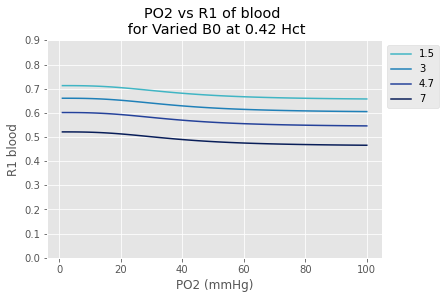

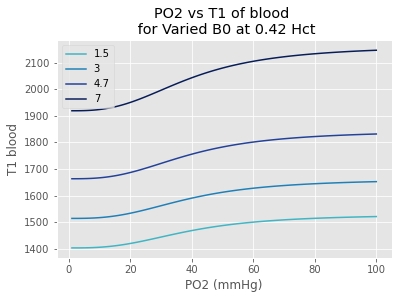

In [67]:
Hb=5.15 # mmol Hb tetramer/L plasma
#print(fwatere)
r1deoxyHb=0.033 #s-1 L plasma in erythrocyte / mmol Hb tetramer
r1=0.00025 #s-1/mmHg
bR1eox=1.099 #s-1
mR1eox=-0.057 #s-1 T-1
bR1p=0.496 #s-1
mR1p=-0.023 #s-1 T-1 # from Hales paper
Hct=0.42

po2_xaxis=np.linspace(1,100,100)
so2_list=np.zeros(len(po2_xaxis))

for i in range(1,len(po2_xaxis)):
    po2=i
    S=(po2**n)/((po2**n)+(P50**n))
    so2_list[i]=S
so2=so2_list 

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in [1.5,3,4.7,7]:
    B0=x
    fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    R1_blood=fwatere*(bR1eox+(mR1eox*B0)+((r1deoxyHb*Hb)*(1-so2)))+((1-fwatere)*(bR1p+(mR1p*B0)))
    plt.plot(po2_xaxis,R1_blood,label=str(B0))
    plt.title('PO2 vs R1 of blood \n for Varied B0 at 0.42 Hct')
    plt.xlabel('PO2 (mmHg)')
    plt.ylim(0,0.9)
    plt.ylabel('R1 blood')
colormap = plt.cm.YlGnBu #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.5,1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))
    

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in [1.5,3,4.7,7]:
    B0=x
    fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    R1_blood=fwatere*(bR1eox+(mR1eox*B0)+((r1deoxyHb*Hb)*(1-so2)))+((1-fwatere)*(bR1p+(mR1p*B0)))
    T1_blood=(1/R1_blood)*1000
    plt.plot(po2_xaxis,T1_blood,label=str(B0))
    plt.title('PO2 vs T1 of blood \n for Varied B0 at 0.42 Hct')
    plt.xlabel('PO2 (mmHg)')
    plt.ylabel('T1 blood')
colormap = plt.cm.YlGnBu #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.5,1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend()

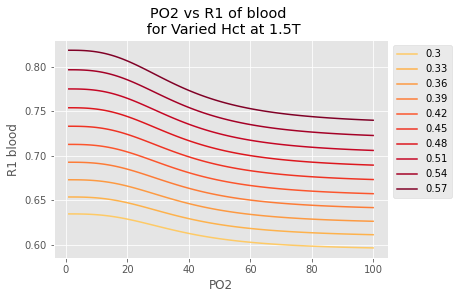

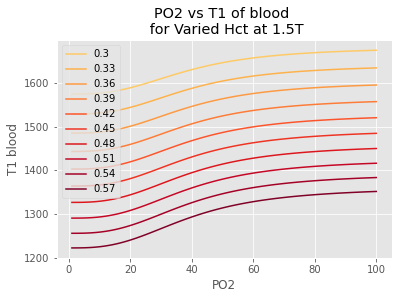

In [69]:
B0=1.5 # Tesla
 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma
#print(fwatere)
r1deoxyHb=0.033 #s-1 L plasma in erythrocyte / mmol Hb tetramer
r1=0.00025 #s-1/mmHg
bR1eox=1.099 #s-1
mR1eox=-0.057 #s-1 T-1
bR1p=0.496 #s-1
mR1p=-0.023 #s-1 T-1 # from Hales paper

po2_xaxis=np.linspace(1,100,100)
so2_list=np.zeros(len(po2_xaxis))

for i in range(1,len(po2_xaxis)):
    po2=i
    S=(po2**n)/((po2**n)+(P50**n))
    so2_list[i]=S
so2=so2_list 

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in range(30,60,3):
    Hct=x/100
    fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    R1_blood=fwatere*(bR1eox+(mR1eox*B0)+((r1deoxyHb*Hb)*(1-so2)))+((1-fwatere)*(bR1p+(mR1p*B0)))
    plt.plot(po2_xaxis,R1_blood,label=str(Hct))
    plt.title('PO2 vs R1 of blood \n for Varied Hct at 1.5T')
    plt.xlabel('PO2')
    plt.ylabel('R1 blood')
colormap = plt.cm.YlOrRd #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.3, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))
    

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in range(30,60,3):
    Hct=x/100
    fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    R1_blood=fwatere*(bR1eox+(mR1eox*B0)+((r1deoxyHb*Hb)*(1-so2)))+((1-fwatere)*(bR1p+(mR1p*B0)))
    T1_blood=(1/R1_blood)*1000
    plt.plot(po2_xaxis,T1_blood,label=str(Hct))
    plt.title('PO2 vs T1 of blood \n for Varied Hct at 1.5T')
    plt.xlabel('PO2')
    plt.ylabel('T1 blood')
colormap = plt.cm.YlOrRd #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.3, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend()

# 6. Considering the effect of adding surplus oxygen to the blood system

#### Looking at delta R1 from adding surplus oxygen to the blood, i.e. from breathing 100% oxygen, the high-level equation would be: 

$\Delta R1_{blood}=R1_{bloodafter}-R1_{bloodbefore}$

---

#### So, starting with the equation from Hill 2015:

$R1_{blood}=f_{e}*(R1_{eox} + r1_{deoxyHb}[Hb]*(1-SO2)) + (1-f_{e})R1_p$

---


Where $R1_{eox}$, $R1_{p}$ and $r1_{deoxyhb}$ have a linear dependance on B0:


<font color='LightCoral'>$R1eox = m_{R1eox}*B_0 + b_{R1eox}$  </font>


<font color='YellowGreen'> $R1p = m_{R1p}*B_0 + b_{R1p}$ </font>


<font color='SkyBlue'> $r1_{deoxyhb} = m_{r1_{deoxyhb}}*B_0 + b_{r1_{deoxyhb}}$  
    </font>


---

#### To find delta R1, we look at after-before:
$\Delta R1_{blood}=$ <font color='DarkTurquoise'>$R1_{blood after} - $</font><font color='DarkOrange'>$R1_{blood before}$</font>

---

$\Delta R1_{blood}=$ <font color='DarkTurquoise'>$[f_{e}*(R1_{eox} + r1_{deoxyHb}[Hb]*(1-SO2_{after})) + (1-f_{e})R1_{p-after})] -$ </font><font color='DarkOrange'>$ [f_{e}*(R1_{eox} + r1_{deoxyHb}[Hb]*(1-SO2_{before})) + (1-f_{e})R1_{p-before}]$</font>

---

$\Delta R1_{blood}=f_{e}*[R1_{eox}+r1_{deoxyHb}[Hb]*(1-SO2_{after})]-f_{e}*[R1_{eox}+r1_{deoxyHb}[Hb]*(1-SO2_{before})] + (1-f_{e})R1_{p-after} - (1-f_{e})R1_{p-before}$

---

$\Delta R1_{blood}=f_{e}*[ $~~R1_{eox}-R1_{eox}~~$ + r1_{deoxyHb}[Hb]*(1-SO2_{after})-r1_{deoxyHb}[Hb]*(1-SO2_{before})] + (1-f_{e})[R1_{p-after}-R1_{p-before}]$


---

$\Delta R1_{blood}=f_{e}*r1_{deoxyHb}*[Hb][$ <font color='DarkTurquoise'>$(1-SO2_{after})-$</font><font color='DarkOrange'>$(1-SO2_{before}$</font>$)] + (1-f_{e})[$</font><font color='DarkTurquoise'>$R1_{p-after}-$</font><font color='DarkOrange'>$R1_{p-before}]$</font>


---

### The remaining equation:
In the remaining equation, we see a $\Delta R1_p$ section form. 

$\Delta R1_{blood}=f_{e}*r1_{deoxyHb}*[Hb][(1-SO2_{after})-(1-SO2_{before})] + (1-f_{e})$ <font color='YellowGreen'>$(\Delta R1_p)$</font>


---

#### Dependence on B0:
- <font color='LightCoral'>R1_eox</font> has been cancelled out 
- Hales et al established that <font color='SkyBlue'>$r1_{deoxyhb}$</font> does not change with B0, so it is just a constant now. It also does not change with oxygen concentration.
- <font color='YellowGreen'>R1p</font> remains, and is linearly dependent on B0:

<font color='YellowGreen'>
$R1p = m_{R1p}*B_0 + b_{R1p}$ </font>

However, delta R1 in the plasma also depends linearly on $r1_{oxygen}*C_{oxygen}$, so we can add a term:

---
$R1p_{before} = m_{R1p}*B_0 + b_{R1p} + $ <font color='Red'>$r1_{oxygen}*C_{before} $</font>

$R1p_{after} = m_{R1p}*B_0 + b_{R1p}+ $ <font color='Red'>$r1_{oxygen}*C_{after} $</font>


---
Note that  $m_{R1p}*B_0 + b_{R1p}$ don't change before and after oxygen, so they cancel out, and therefore delta Rp no longer depends on B0: 

$\Delta R1_p = R1p_{after} - R1p_{before}$

$\Delta R1_p = r1_{oxygen}*C_{after} - r1_{oxygen}*C_{before}$

<font color='YellowGreen'> $\Delta R1_p = r1_{oxygen}*(C_{after}-C_{before})$ </font>

---
#### What about Oxygen Relaxivity  ( $r1_{oxygen}$ ) - Dependence on B0? 
It seems that $r1_{oxygen}$ also varies with field strength, which, if we model it the same way that Hales et al modelled $r1_{deoxyhb}$ then the equation would be:

<font color='IndianRed'> $r1_{ox} = m_{r1_{ox}}*B_0 + b_{r1_{ox}}$  
    </font>
    
... and we would want to fit literature values to calculate m and b. 

### Which means the final equation for Delta R1 of blood, including hyperoxia is:

$\Delta R1_{blood}=f_{e}*r1_{deoxyHb}*[Hb]*[(1-SO2_{after})-(1-SO2_{before})] + (1-f_{e})*(r1_{oxygen}*(C_{Oxafter}-C_{Oxbefore}))$

---
Where R1_{blood} is a function of hematocrit, SO2, PO2, and and B0:
- Hct is the hematocrit (0-1)
- SO2 is the oxygen saturation fraction (0-1)
- [Hb] is the mean corpuscular haemoglobin concentration (5.15mmol Hb tetramer/L plasma)
- r1deoxyHb is the molar relaxivity of deoxyhaemoglobin (s-1 L plasma in erythrocyte/mmol Hb tetramer).
- $f_{watere}$ is the fraction of water in whole blood that resides in erythrocytes(0-1), which is described by: $f_{watere} = \frac{0.70*Hct}{0.70*Hct+0.95*(1-Hct)}$
- SO2 and PO2 are related by the Hill equation $S=((23400*((pO2^3)+150*pO2)^{-1}+1)^{-1})$
- $r1_{oxygen}$ is the oxygen relaxivity is a function of B0, represented by: $r1_{oxygen} = m_{r1_{ox}}*B_0 + b_{r1_{ox}}$ 

 

# 7. Oxygen Relaxivity Field strength dependence - estimating $m_{r1_{ox}}$ and $b_{r1_{ox}}$

Here's a plot of all the literature I could find that calculated the relaxivity of oxygen in water, saline, vitreous solution, and plasma. I've also included my datapoint at 7T from our own experiments.

<img src="relaxivity_vs_b0.png" width="700" />

The field strength data ranges from 1.5-8.4 T, however if we include a paper that adjusted a 1.5T scanner to operate at 0.55T, we can include their measurement. However, this is in lung tissue and not simply fluid.


<img src="relaxivity_vs_b0_lung.png" width="700"  />

Either way, this doesn't actually change the variables estimated for the linear fit: $m_{r1_{ox}}=0.00002$ (units: $s^{-1} mmHg^{-1} T^{-1}$), $b_{r1_{ox}}=-0.0003$ (units: $s^{-1} mmHg^{-1}$)

Which means $r1_{oxygen}$ in $s^{-1} mmHg^{-1}$ can be calculated by $r1_{oxygen} = 0.00002*B_0 + -0.0003$, which means at from 1.5-8.4T it will range from 0.00027 to 0.000132 $s^{-1} mmHg^{-1}$

### Plots: Change in R1 depending on both starting blood pO2 and final blood pO2

This is the remaining equation,   

$\Delta R1_{blood}=f_{e}*r1_{deoxyHb}*[Hb][(1-SO2_{after})-(1-SO2_{before})] + (1-f_{e})*(\Delta R1_p)$

which results in the following graphs if plotted for varying starting PO2s and final PO2s:

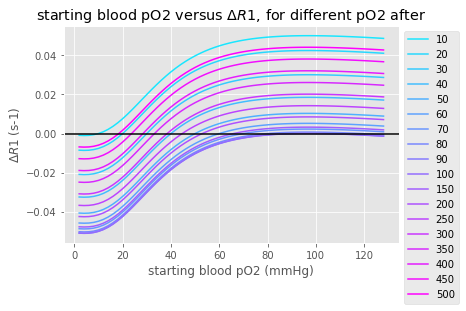

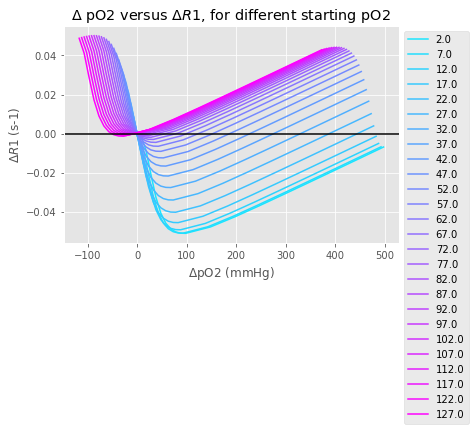

In [71]:
Hct=0.47 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma
fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
#print(fwatere)
r1deoxyHb=0.033 #s-1 L plasma in erythrocyte / mmol Hb tetramer
r1=0.00020 #r1 of oxygen: s-1/mmHg

from matplotlib import cm
from colorspacious import cspace_converter #pip install colorspacious
from collections import OrderedDict


paO2_after_list=[10,20,30,40,50,60,70,80,90,100,150,200,250,300,350,400,450,500]
paO2_before_list=np.arange(2,130,2,dtype=float)# mmHg
delta_R1bloodtotal_list=np.zeros(len(paO2_before_list))

        
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

for j in range(0,len(paO2_after_list)):
    for i in range(0,len(paO2_before_list)):
        #R1arterialbefore:
        paO2before=paO2_before_list[i] #mmHg
        Sbefore=(paO2before**n)/((paO2before**n)+(P50**n))

        #R1arterialafter:
        paO2after=paO2_after_list[j] #mmHg
        Safter=(paO2after**n)/((paO2after**n)+(P50**n))

        deltapaO2=paO2after-paO2before
        deltaR1plasma=r1*deltapaO2

        deltaR1bloodtotal=(fwatere*r1deoxyHb*Hb*((1-Safter)-(1-Sbefore)))+(1-fwatere)*(deltaR1plasma)
        delta_R1bloodtotal_list[i]=deltaR1bloodtotal

    ax1.plot(paO2_before_list,delta_R1bloodtotal_list,label=str(paO2after))
    
colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.axhline(color='k')
    
    
plt.title('starting blood pO2 versus $\Delta R1$, for different pO2 after')
plt.xlabel('starting blood pO2 (mmHg)')
plt.ylabel('$\Delta R1$ (s-1)')
plt.legend(bbox_to_anchor=(1, 1))

paO2_before_list=np.arange(2,130,5,dtype=float)

delta_R1bloodtotal_list=np.zeros((len(paO2_before_list),len(paO2_after_list)))
deltapaO2_list=np.zeros((len(paO2_before_list),len(paO2_after_list)))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

for i in range(0,len(paO2_before_list)):
    for j in range(0,len(paO2_after_list)):
        #R1arterialbefore:
        paO2before=paO2_before_list[i] #mmHg
        Sbefore=(paO2before**n)/((paO2before**n)+(P50**n))

        #R1arterialafter:
        paO2after=paO2_after_list[j] #mmHg
        Safter=(paO2after**n)/((paO2after**n)+(P50**n))

        deltapaO2=paO2after-paO2before
        deltapaO2_list[i,j]=deltapaO2
        deltaR1plasma=r1*deltapaO2

        deltaR1bloodtotal=(fwatere*r1deoxyHb*Hb*((1-Safter)-(1-Sbefore)))+(1-fwatere)*(deltaR1plasma)
        delta_R1bloodtotal_list[i,j]=deltaR1bloodtotal

    
for i in range(0,len(paO2_before_list)):
    plt.plot(deltapaO2_list[i],delta_R1bloodtotal_list[i],label=paO2_before_list[i])

colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax2.lines))]
for i,j in enumerate(ax2.lines):
    j.set_color(colors[i])
    
plt.axhline(color='k')

 
plt.title('$\Delta$ pO2 versus $\Delta R1$, for different starting pO2')
plt.xlabel('$\Delta $pO2 (mmHg)')
plt.ylabel('$\Delta R1$ (s-1)')
plt.legend(bbox_to_anchor=(1, 1))




# 8. Encorporating a tissue compartment & adding bloodvolume variable
In a voxel with tissue as well, the contrast changes due to deoxyHb changes in the blood may be negligible, however the blood compartment itself determines the resulting paO2 from the added oxygen, which will determine the ptO2.

$\Delta R1_{voxeltotal}=bloodvolume*\Delta R1_{bloodtotal}+(1-bloodvolume)*r1*\Delta ptO2$

I've added a component called bloodvolume, which is the percent of the voxel that would be considered blood (range 0-1).

#### Blood volume is set to 5%

In [74]:
def startingpo2_vs_deltaR1(pO2_after_list,pO2_before_list,bloodvolume,title):
    Hct=0.47 # from 0-1
    Hb=5.15 # mmol Hb tetramer/L plasma
    fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    #print(fwatere)
    r1deoxyHb=0.033 #s-1 L plasma in erythrocyte / mmol Hb tetramer
    r1=0.00020 #s-1/mmHg

    delta_R1voxeltotal_list=np.zeros(len(pO2_before_list))

    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    for j in range(0,len(pO2_after_list)):
        for i in range(0,len(pO2_before_list)):
            #R1arterialbefore:
            pO2before=pO2_before_list[i] #mmHg
            Sbefore=(pO2before**n)/((pO2before**n)+(P50**n))

            #R1arterialafter:
            pO2after=pO2_after_list[j] #mmHg
            Safter=(pO2after**n)/((pO2after**n)+(P50**n))

            deltapO2=pO2after-pO2before
            #deltaR1plasma=R1plasmabefore-R1plasmaafter
            deltaR1plasma=r1*deltapO2

            deltaR1bloodtotal=fwatere*r1deoxyHb*Hb*((1-Safter)-(1-Sbefore))+(1-fwatere)*(deltaR1plasma)
            
            deltatissuepO2=deltapO2 ## MUST BE CHANGED
            
            deltaR1_voxeltotal=bloodvolume*deltaR1bloodtotal+(1-bloodvolume)*r1*deltatissuepO2
            delta_R1voxeltotal_list[i]=deltaR1_voxeltotal

        plt.plot(pO2_before_list,delta_R1voxeltotal_list,label=str(pO2after))

    colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
    colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax1.lines))]
    for i,j in enumerate(ax1.lines):
        j.set_color(colors[i])
    ax1.set_aspect(0.8/ax1.get_data_ratio(), adjustable='box')
    
    plt.axhline(color='k')
    plt.title(str(title))
    plt.xlabel('Initial pO2 (mmHg)')
    plt.ylabel('$\Delta R1$ (s-1)')
    plt.legend(bbox_to_anchor=(1, 1))

def deltapO2_vs_deltaR1_fullscale(pO2_after_list,pO2_before_list,bloodvolume,title):
    delta_R1voxeltotal_list=np.zeros((len(pO2_before_list),len(pO2_after_list)))
    deltapO2_list=np.zeros((len(pO2_before_list),len(pO2_after_list)))

    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)

    for i in range(0,len(pO2_before_list)):
        for j in range(0,len(pO2_after_list)):
            #R1arterialbefore:
            pO2before=pO2_before_list[i] #mmHg
            Sbefore=(pO2before**n)/((pO2before**n)+(P50**n))

            #R1arterialafter:
            pO2after=pO2_after_list[j] #mmHg
            Safter=(pO2after**n)/((pO2after**n)+(P50**n))
            deltapO2=pO2after-pO2before
            deltapO2_list[i,j]=deltapO2
 
            deltaR1plasma=r1*deltapO2

            deltaR1bloodtotal=fwatere*r1deoxyHb*Hb*((1-Safter)-(1-Sbefore))+(1-fwatere)*(deltaR1plasma)
            #print('delta R1 blood total is '+str(deltaR1bloodtotal))
            
            deltatissuepO2=deltapO2 ## MUST BE CHANGED
            
            deltaR1_voxeltotal=bloodvolume*deltaR1bloodtotal+(1-bloodvolume)*r1*deltatissuepO2
            delta_R1voxeltotal_list[i,j]=deltaR1_voxeltotal

    for i in range(0,len(pO2_before_list)):
        plt.plot(deltapO2_list[i],delta_R1voxeltotal_list[i],label=pO2_before_list[i])

    colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
    colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax2.lines))]
    for i,j in enumerate(ax2.lines):
        j.set_color(colors[i])
    ax2.set_aspect(0.8/ax2.get_data_ratio(), adjustable='box')
    plt.axhline(color='k')

    plt.title(str(title))
    plt.xlabel('$\Delta$ pO2 (mmHg)')
    plt.ylabel('$\Delta R1$ (s-1)')
    plt.xlim(0,300)
    plt.legend(bbox_to_anchor=(1, 1))
    

## 100% Venous Blood
- blood volume=1
- starting pO2 = 30-60
- ending pO2 from 50-300 mmHg


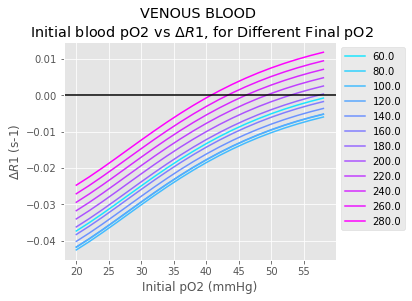

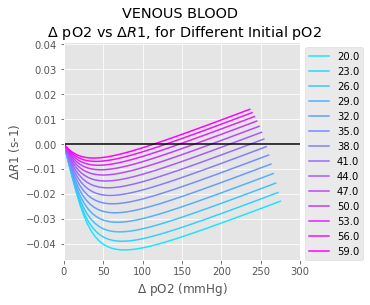

In [75]:
pO2_after_list=np.arange(60,300,20,dtype=float)
pO2_before_list=np.arange(20,60,2,dtype=float)

bloodvolume = 1
title='VENOUS BLOOD \n Initial blood pO2 vs $\Delta R1$, for Different Final pO2'
startingpo2_vs_deltaR1(pO2_after_list,pO2_before_list,bloodvolume,title)

pO2_after_list=np.arange(20,300,5,dtype=float)
pO2_before_list=np.arange(20,60,3,dtype=float)

title='VENOUS BLOOD \n $\Delta$ pO2 vs $\Delta R1$, for Different Initial pO2'
deltapO2_vs_deltaR1_fullscale(pO2_after_list,pO2_before_list,bloodvolume,title)


## 100% Arterial Blood
- blood volume = 1
- starting pO2 80-90mmHg
- resulting pO2 90+ 

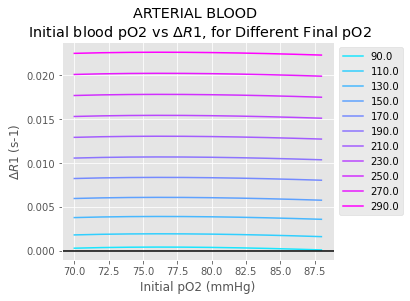

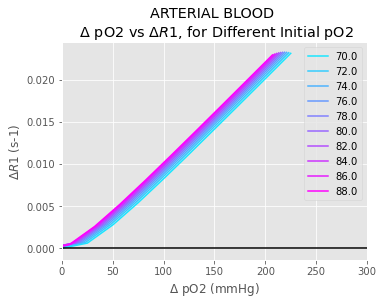

In [18]:
pO2_after_list=np.arange(90,300,20,dtype=float)
pO2_before_list=np.arange(70,90,2,dtype=float)

bloodvolume = 1
title='ARTERIAL BLOOD \n Initial blood pO2 vs $\Delta R1$, for Different Final pO2'
startingpo2_vs_deltaR1(pO2_after_list,pO2_before_list,bloodvolume,title)

pO2_after_list=np.arange(70,300,25,dtype=float)
pO2_before_list=np.arange(70,90,2,dtype=float)

title='ARTERIAL BLOOD \n $\Delta$ pO2 vs $\Delta R1$, for Different Initial pO2'
deltapO2_vs_deltaR1_fullscale(pO2_after_list,pO2_before_list,bloodvolume,title)

## Normoxic Tissue, 5% bloodvolume, but tpo2 is equal to blood po2 (unrealistic, so move onto next section)
- Blood volume = 0.05
- starting po2 is oxygenated (40-90)
- po2 after = 90+ 
- no negative delta pO2 upon adding O2
- currently, delta pO2 tissue == delta pO2 blood

In [ ]:
pO2_after_list=np.arange(90,300,20,dtype=float)
pO2_before_list=np.arange(40,90,5,dtype=float)
bloodvolume = 0.05

title='NORMOXIC TISSUE \n Initial pO2 vs $\Delta R1$, for Different Final pO2'
startingpo2_vs_deltaR1(pO2_after_list,pO2_before_list,bloodvolume,title)

title='NORMOXIC TISSUE \n $\Delta$ pO2 vs $\Delta R1$, for Different Initial pO2'
deltapO2_vs_deltaR1_fullscale(pO2_after_list,pO2_before_list,bloodvolume,title)


# 9. Estimating a More Realistic $\Delta$Tissue PO2 via Krough Tissue Cylinder

# Standard Krogh Model
### Model Parameters

In [51]:
po2_c = 90; 
so2_a=0.99;
# [mmHg] artial pressure of oxygen in blood at capillary entrance 

D = 2.41e-9 # [m^2/s] diffusivity of O2 in tumour tissue 
k = 1.5e-5 # [M/mmHg] solubility of O2 in tumour tissue 
K = D*k

M0 = 0.1  # mol/m^3/s
# 0.002M0 is the maximum local O2 consumption rate
# tumour tissue: 0.0122 mol/m^3/s
# normal tissue: 0.00197 mol/m^3/s

# from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3899881/
# For the DLD1 spheroids studied, the consumption rate for all spheroids studied was 
# approximately constant at a = 7.29 ± 1.4 × 10−7 m3 kg−1 s−1, 
# in good agreement with previous data from similar approaches [26].

# tumour tissue O2 consumption rate [M/s] 
# https://www.tandfonline.com/doi/pdf/10.3109/02841869509093981
# The maximal consumption rate is = 2.4 cm3 O2/100 g/min, at the upper end 
# of the range observed experimentally in this preparation (10).


Pcrit=3 #or 0.35 mmHg 
# mmHg, from https://journals.physiology.org/doi/pdf/10.1152/ajpheart.00559.2003

p50 = 34 # PO2 at 50% saturation [mmHg] from the secomb paper lee et al 2014
n = 3 # Hill Coefficient for O2-hemoglobin binding 
v = 0.00114 # capillary velocity [m/s]

Rc = 5e-6; # [m] capillary radius - 5 to 10 micrometres (μm) in diameter
L = 0.0006; # [m] Length of capillary segment the average length of a capillary is about ~600 microns

Rt = 1e-5; # m| Tissue Cylinder radius

Hct=0.45

CHb= 20.1 #ml O2/dL
# The oxygen-carrying capacity of the blood is calculated as the concentration of hemoglobin (in g / dL blood) 
# times 1.34 mL O2 / g Hb. In a healthy person, with a hemoglobin concentration of 15 g / dL blood, 
# the oxygen carrying capacity is 20.1 mL O2 / dL blood#  




## Equation for PO2 in Tissue
Paraphrased from ['Theoretical Models of Microvascular Oxygen Transport to Tissue'](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3057578/) by Daniel Goldman:

The Krogh-Erlang solution has the following assumptions:

- Tissue O2 consumption is constant and uniform
- Tissue PO2 at the capillary wall equals average capillary pO2 (no IVR)
- Tissue O2 solubility and diffusivity are uniform
- Axial (or longitudinal) diffusion of O2 is not significant 
- All important microvascular O2 transport phenomena are steady-state
- All capillaries are parallel, unbranched, and equally spaced
- All capillaries recieve equal convective O2 supply
- Capillaries are the only microvessels that play a role in O2 transport to tissue

For steady state pO2 in the tissue cylinder and a given capillary PO2, the Krogh-Erlang solution is:

$ P(r) = P_{cap} + \frac{M_0}{4K}(r^2-R^2_c) - \frac{M_0 R_t^2}{2K} ln\frac{r}{R_{cap}} $

Where:
- P is the pO2 at r in the tissue 
- P=Pcap at R=Rcap
- r is the radial coordinate
- K is the Krogh diffusion constant K=Dk, D is the tissue O2 diffusivity and k is the tissue O2 solubility 
- M0 is the tissue O2 consumption rate
- Rcap is capillary radius 
- Rt is tissue radius

Text(0, 0.5, 'pO2 (mmHg)')

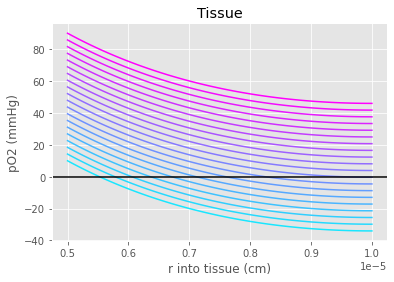

In [35]:
r_list = np.linspace(Rc,Rt,100)
po2_list=np.zeros(100)
pcap_list=np.linspace(10,90,20)

fig = plt.figure()
ax = fig.add_subplot(111)
for j in range(0,len(pcap_list)):
    for i in range(0,len(r_list)):
        r=r_list[i]
        po2_c=pcap_list[j]
        po2_r=po2_c+((M0/(4*K))*(r**(2)-Rc**(2))) - ((M0*Rt**2)/(2*K))*(math.log((r/Rc))) # that log is actually ln
        po2_list[i]=po2_r

    
    plt.plot(r_list,po2_list)


colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax.lines))]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i])
plt.axhline(color='k')

plt.title('Tissue')
plt.xlabel('r into tissue (cm)')
plt.ylabel('pO2 (mmHg)')

## Modifications to Krogh Model - O2 Consumption 

Paraphrased from ['Theoretical Models of Microvascular Oxygen Transport to Tissue'](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3057578/) by Daniel Goldman:

An important modification made to the Krogh cylinder model above is the assumption of pO2-dependent tissue O2 consumption. PO2-Dependent O2 consumption can be added to the model.
Experiments suggest that the local tissue O2 consumption rate is found to be approximately constant for tissue pO2 above a certain value, Pcrit; below this value O2 consumption drops off sharply to zero. Therefore, in order to study situations in which hypoxia is expected (which is relevant to our tumour tissue R1 model here), a mathematical model of PO2-dependent consumption is required. The most common model (Michaelis-Menten) uses first-order kinetics and gives the following equilibirum O2 consumption rate:

$ M(P) =\frac{M_0*P}{P + P_{crit}}$

where:
- P is the tissue po2
- M0 is the maximum local O2 consumption rate 

Note: "This model does not keep O2 consumption strictly constant for P>Pcrit, but gives a reasonable approximation to the actual behaviour and is more convenient computationally than the zeroth-order (on-off) model. Although M0 depends on the particular tissue and conditions being considered, Pcrit is usually taken to be in the range of 0.5-1.0mmHg."

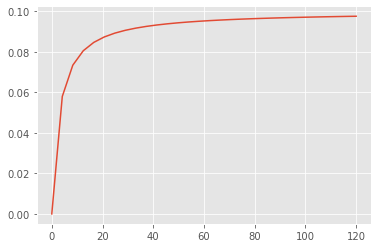

In [47]:
Mlist=np.zeros(30)
po2_list=np.linspace(120,0,30)

for i in range(0,len(po2_list)):
    po2_r=po2_list[i]
    M=(M0*po2_r)/(po2_r+Pcrit)
    Mlist[i]=M
plt.figure()
plt.plot(po2_list,Mlist)

Text(0, 0.5, 'pO2 (mmHg)')

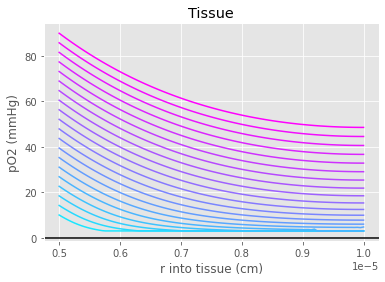

In [48]:
r_list = np.linspace(Rc,Rt,100)
po2_list=np.zeros(100)
pcap_list=np.linspace(10,90,20)
Mlist=np.zeros((100,20))

fig = plt.figure()
ax = fig.add_subplot(111)

for j in range(0,len(pcap_list)):
    for i in range(0,len(r_list)):
        r=r_list[i]
        po2_c=pcap_list[j]
        
        if i==0:
            M=(M0*po2_c)/(po2_c+Pcrit)
            po2_r=po2_c+((M/(4*K))*(r**(2)-Rc**(2))) - ((M*Rt**2)/(2*K))*(math.log((r/Rc))) # that log is actually ln

        if i>0:
            if po2_r>Pcrit:
                M=(M0*po2_r)/(po2_r+Pcrit)
                po2_r=po2_c+((M/(4*K))*(r**(2)-Rc**(2))) - ((M*Rt**2)/(2*K))*(math.log((r/Rc))) # that log is actually ln
            if po2_r<=Pcrit:
                po2_r=Pcrit
        po2_list[i]=po2_r

    plt.plot(r_list,po2_list)


colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax.lines))]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i])
plt.axhline(color='k')

plt.title('Tissue')
plt.xlabel('r into tissue (cm)')
plt.ylabel('pO2 (mmHg)')

## PO2 Along Capillary
Paraphrased from ['Theoretical Models of Microvascular Oxygen Transport to Tissue'](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3057578/) by Daniel Goldman:

To find the given Pcap along the capillary direction z, following equation can be used to calculate the SO2. 

$SO2(z)= SO2_a - \frac{M_0*(R^2_t-R^2_c)}{Hct*CHb*v}*z$

where: 
- Hct is the hematocrit
- CHb is the O2-binding capacity of the RBC Hb - CHb is the product of the RBC hemoglobin concentration and the O2 binding capacity of Hb
- v is RBC velocity

The invertible form of the Hb-O2 dissociation curve (e.g., the Hill equation) can be used as Pcap(z)=P(S(z)) to find the Pcap to use in the solution for the tissue pO2:

$SO2(P)=\frac{P^n}{P^n+P^n_{50}}$

rearranged:
$SO2(P)=\frac{P^n}{P^n+P^n_{50}}$

$P = \sqrt[n]{\frac{-(P^n_{50}*SO2)}{SO2-1}}$

where:
- P the PO2 inside RBC
- P50 is the half-saturation PO2 
- n is the Hill exponent

P50 and n are found by fitting this equation to experimental data, with typical values of P50=37mmHg and n=2.7 for a rat (not sure of human values yet).

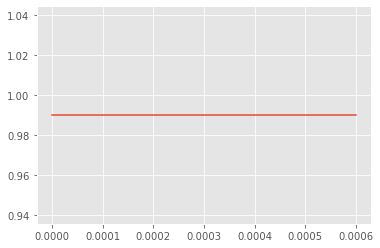

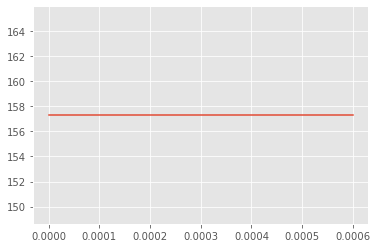

In [86]:
CHb=0.5
M0 = 0.5
v = 0.0011

z=np.linspace(0,L,100)
so2=so2_a-((M0*((Rt**(2))-(Rc**(2))))/Hct*CHb*v)*z

p=(-(so2*(p50**n))/(so2-1))**(1/n)

plt.figure()
plt.plot(z,so2)

plt.figure()
plt.plot(z,p)